<a href="https://colab.research.google.com/github/ShrieVarshini2004/Machine-Learning-Basics/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is to visualize simple linear regression using a dataset in IBM cloud

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

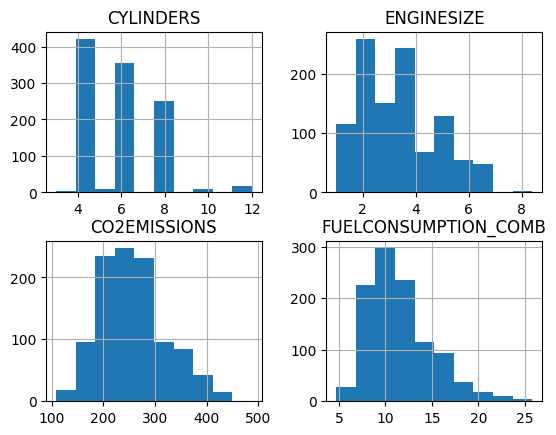

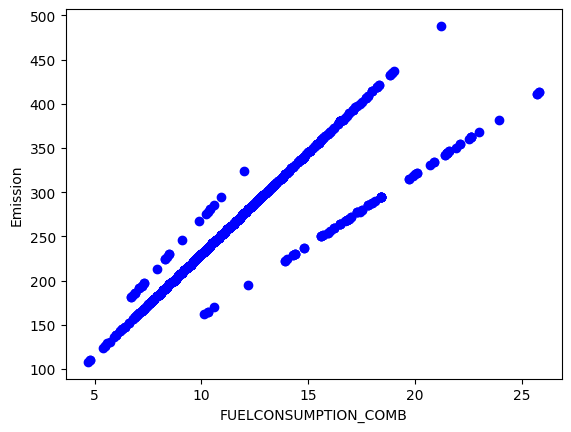

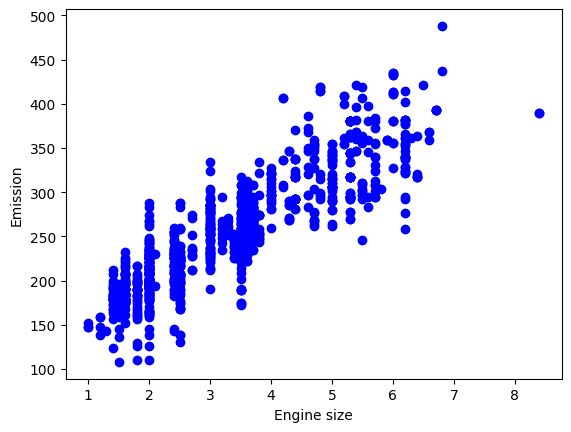

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the path to the CSV file
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

# Read the CSV file directly from the URL
df = pd.read_csv(path)

# Take a look at the dataset
print(df.head())

# Summarize the data
print(df.describe())

# Select specific columns
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
print(cdf.head(9))

# Visualize the data
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


Visualizations:
Histograms:

These show the distribution of individual features such as CYLINDERS, ENGINESIZE, CO2EMISSIONS, and FUELCONSUMPTION_COMB.
You can observe patterns like the range of CO2EMISSIONS or how frequently certain engine sizes occur.
Scatter Plot (Fuel Consumption vs. Emission):

The scatter plot shows the relationship between FUELCONSUMPTION_COMB (combined fuel consumption) and CO2EMISSIONS.
Generally, you’ll observe a positive correlation: as fuel consumption increases, CO2 emissions also increase.
Scatter Plot (Engine Size vs. Emission):

This plot illustrates the relationship between ENGINESIZE and CO2EMISSIONS.
Larger engines typically produce more emissions, showing a positive correlation.
Purpose:
The visualizations aim to show linear relationships in the dataset, making it a suitable candidate for linear regression.

.

This code plots the simple linear rehression for Boston Housing dataset from keras

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Mean Squared Error: 32.39


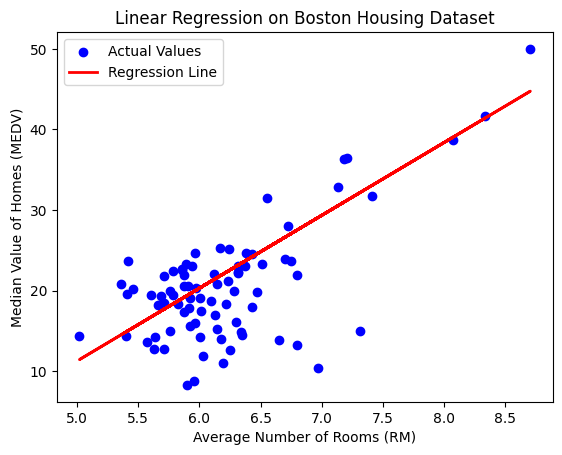

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
(data_train, target_train), (data_test, target_test) = boston_housing.load_data()

# Convert to DataFrame for better visualization
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX",
    "PTRATIO", "B", "LSTAT"
]
df_train = pd.DataFrame(data_train, columns=columns)
df_train['MEDV'] = target_train

# Select RM (average number of rooms) as the independent variable
X = df_train[['RM']].values
y = df_train['MEDV'].values

# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Calculate mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualize the regression
plt.scatter(X_val, y_val, color='blue', label='Actual Values')
plt.plot(X_val, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Value of Homes (MEDV)")
plt.title("Linear Regression on Boston Housing Dataset")
plt.legend()
plt.show()


Visualizations:
Scatter Plot (Average Number of Rooms vs. Median Home Value):

Each blue dot represents a home, with its x-coordinate as the average number of rooms (RM) and its y-coordinate as the median home value (MEDV).
The red line is the fitted regression line, showing the predicted trend of median home value based on the number of rooms.
Regression Line:

The red line represents the linear relationship between RM and MEDV.
It’s generated by the linear regression model using the training data.
Performance Metric:
Mean Squared Error (MSE):
This measures how close the predicted values are to the actual values.
A lower MSE indicates better model performance.
Insights:
Houses with more rooms (RM) tend to have higher median values (MEDV).
The red regression line shows the general trend but may not perfectly fit the data due to variability.


.

.

.

Multiple linear regression:

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

# Display the first few rows of the dataset
print("Dataset preview:")
print(df.head())

# Select relevant columns for the regression task
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
print("\nFiltered data preview:")
print(cdf.head())

# Split the dataset into training and testing sets
train, test = train_test_split(cdf, test_size=0.2, random_state=42)

# Define training data (features and target variable)
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Define testing data (features and target variable)
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Create and train the linear regression model
regr = LinearRegression()
regr.fit(train_x, train_y)

# Predict CO2 emissions using the testing data
y_hat = regr.predict(test_x)

# Model coefficients
print("\nCoefficients:")
print(f"ENGINESIZE: {regr.coef_[0][0]}, CYLINDERS: {regr.coef_[0][1]}, FUELCONSUMPTION_COMB: {regr.coef_[0][2]}")

# Mean Squared Error
mse = mean_squared_error(test_y, y_hat)
print(f"\nMean Squared Error (MSE): {mse:.2f}")

# Variance score (R^2)
variance_score = r2_score(test_y, y_hat)
print(f"Variance score: {variance_score:.2f}")


Dataset preview:
   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1  

.

Using FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(path)

# Display the first few rows of the dataset
print("Dataset preview:")
print(df.head())

# Select relevant columns for the regression task
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']]
print("\nFiltered data preview:")
print(cdf.head())

# Split the dataset into training and testing sets
train, test = train_test_split(cdf, test_size=0.2, random_state=42)

# Define training data (features and target variable)
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Define testing data (features and target variable)
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Create and train the linear regression model
regr = LinearRegression()
regr.fit(train_x, train_y)

# Predict CO2 emissions using the testing data
y_hat = regr.predict(test_x)

# Model coefficients
print("\nCoefficients:")
print(f"ENGINESIZE: {regr.coef_[0][0]}, CYLINDERS: {regr.coef_[0][1]}, FUELCONSUMPTION_CITY: {regr.coef_[0][2]}, FUELCONSUMPTION_HWY: {regr.coef_[0][3]}")

# Mean Squared Error
mse = mean_squared_error(test_y, y_hat)
print(f"\nMean Squared Error (MSE): {mse:.2f}")

# Variance score (R^2)
variance_score = r2_score(test_y, y_hat)
print(f"Variance score: {variance_score:.2f}")


Dataset preview:
   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1  